## New York City Taxi Trip Duration

En esta competencia, Kaggle reta a construir un modelo que prediga la duración total de los viajes en taxi en la ciudad de Nueva York. Su conjunto de datos primario es publicado por la Comisión de taxis y limusinas de la ciudad de Nueva York, que incluye el tiempo de recogida, las coordenadas geográficas, el número de pasajeros y varias otras variables.

NOTA: Los datos fueron muestreados y limpiados para los propósitos de la competencia. Con base en los atributos de viaje individuales, los participantes deben predecir la duración de cada viaje en el conjunto de prueba.

##### File descriptions 

* train.csv - the training set (contains 1.458.644 trip records) 

* test.csv - the testing set (contains 625.134 trip records) 

* sample_submission.csv  - a sample submission file in the correct format 

* train_enriched.csv (contains 58.345 enriched trip records)

* test_enriched.csv (contains 24.055 enriched trip records)

##### Data fields 

* id - a unique identifier for each trip 

* vendor_id - a code indicating the provider associated with the trip record 

* pickup_datetime - date and time when the meter was engaged 

* dropoff_datetime - date and time when the meter was disengaged 

* passenger_count - the number of passengers in the vehicle (driver entered value) 

* pickup_longitude - the longitude where the meter was engaged 

* pickup_latitude - the latitude where the meter was engaged 

* dropoff_longitude - the longitude where the meter was disengaged 

* dropoff_latitude - the latitude where the meter was disengaged 

* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip 

* trip_duration - duration of the trip in seconds 

Disclaimer: The decision was made to not remove dropoff coordinates from the dataset order to provide an expanded set of variables to use in Kernels. 

##### Data fields added during the enrichment data process

* date_pickup - date when the meter was engaged 

* time_pickup - time when the meter was engaged 

* seconds_pickup - time expressed in seconds when the meter was engaged   

* distance - distance (mi) between the engaged and disengaged points

* pm - time when the meter was engaged is pm or not

* week_day_pickup - day of week when the meter was engaged 

* pickup_to_center - distance (mi) between the engaged point and Cross Bronx Expressway  

* dropof_to_center -  distance (mi) between the disengaged point and Cross Bronx Expressway 

* seconds_pickup_cluster - seconds_pickup categories
 
* distance_cluster - distance categories


In [1]:
import pandas as pd
import numpy as np
import pandas_profiling #Ejecutar "pip install geopy" en Anaconda Prompt

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
import geopy.distance #Ejecutar "pip install geopy" en Anaconda Prompt

import numpy as np
import pandas as pd
import pandas_profiling

# module to do statistics
import scipy.stats  as stats

import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')
import pandas_profiling
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pandas.tools.plotting import scatter_matrix
from statsmodels.graphics.regressionplots import influence_plot
import scipy.stats as stats# Funciones adicionales
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn import preprocessing

In [2]:
import pandas as pd
data = pd.read_csv('data/train_v2.csv', sep=';')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,Dia_semana,Dia_semana_do,Dia_semana_ju,Dia_semana_lu,Dia_semana_ma,Dia_semana_mi,Dia_semana_sa,Dia_semana_vi,Dia_semana_ma.1,segmentos naturales
0,id2377394,1,12/06/2016,12/06/2016 0:54,1,-73.980.415,40.738.564,-73.999.481,40.731.152,N,...,do,1,0,0,0,0,0,0,0.020456,1
1,id3858529,2,19/01/2016,19/01/2016 12:10,1,-73.979.027,40.763.939,-74.005.333,40.710.087,N,...,ma,0,0,0,1,0,0,0,0.059934,1
2,id3504673,2,6/04/2016,6/04/2016 19:39,1,-74.010.040,40.719.971,-74.012.268,40.706.718,N,...,mi,0,0,0,0,1,0,0,0.013438,1
3,id2181028,2,26/03/2016,26/03/2016 13:38,1,-73.973.053,40.793.209,-73.972.923,40.782.520,N,...,sa,0,0,0,0,0,1,0,0.010690,2
4,id1187965,2,19/02/2016,19/02/2016 10:11,2,-73.962.982,40.756.680,-73.984.406,40.760.719,N,...,vi,0,0,0,0,0,0,1,0.021801,1


In [3]:
data[0:5]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,Dia_semana,Dia_semana_do,Dia_semana_ju,Dia_semana_lu,Dia_semana_ma,Dia_semana_mi,Dia_semana_sa,Dia_semana_vi,Dia_semana_ma.1,segmentos naturales
0,id2377394,1,12/06/2016,12/06/2016 0:54,1,-73.980.415,40.738.564,-73.999.481,40.731.152,N,...,do,1,0,0,0,0,0,0,0.020456,1
1,id3858529,2,19/01/2016,19/01/2016 12:10,1,-73.979.027,40.763.939,-74.005.333,40.710.087,N,...,ma,0,0,0,1,0,0,0,0.059934,1
2,id3504673,2,6/04/2016,6/04/2016 19:39,1,-74.010.040,40.719.971,-74.012.268,40.706.718,N,...,mi,0,0,0,0,1,0,0,0.013438,1
3,id2181028,2,26/03/2016,26/03/2016 13:38,1,-73.973.053,40.793.209,-73.972.923,40.782.520,N,...,sa,0,0,0,0,0,1,0,0.010690,2
4,id1187965,2,19/02/2016,19/02/2016 10:11,2,-73.962.982,40.756.680,-73.984.406,40.760.719,N,...,vi,0,0,0,0,0,0,1,0.021801,1


In [4]:
data=data[data.columns[1:21]] 

In [5]:
data.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'Dia_semana',
       'Dia_semana_do', 'Dia_semana_ju', 'Dia_semana_lu', 'Dia_semana_ma',
       'Dia_semana_mi', 'Dia_semana_sa', 'Dia_semana_vi', 'Dia_semana_ma.1',
       'segmentos naturales'],
      dtype='object')

In [6]:
data=pd.DataFrame(data)

In [7]:
data.columns=['vendor_id', 'pickup_datetime', 'dropoff_datetime','passenger_count', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag','trip_duration', 'Dia_semana', 'Dia_semana_do', 'Dia_semana_ju','Dia_semana_lu', 'Dia_semana_ma', 'Dia_semana_mi', 'Dia_semana_sa','Dia_semana_vi', 'Distancia_Eucladiana', 'segmentos naturales']
      

In [8]:
data.dtypes

vendor_id                 int64
pickup_datetime          object
dropoff_datetime         object
passenger_count           int64
pickup_longitude         object
pickup_latitude          object
dropoff_longitude        object
dropoff_latitude         object
store_and_fwd_flag       object
trip_duration             int64
Dia_semana               object
Dia_semana_do             int64
Dia_semana_ju             int64
Dia_semana_lu             int64
Dia_semana_ma             int64
Dia_semana_mi             int64
Dia_semana_sa             int64
Dia_semana_vi             int64
Distancia_Eucladiana    float64
segmentos naturales       int64
dtype: object

### Ajustes al dataset de entranamiento

Se eliminan puntos atípicos respecto a su posición geográfica

In [9]:
#Data frame auxiliar para pintar mapa
#Se excluyen puntos que están demasiado al este
data_aux = data

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap #conda install -c conda-forge basemap
import pandas as pd
import io

#u = u"""latitude,longitude
#42.357778,-71.059444
#39.952222,-75.163889
#25.787778,-80.224167
#30.267222, -97.763889"""

# read in data to use for plotted points
#buildingdf = pd.read_csv(io.StringIO(u), delimiter=",")
lat = data_aux['pickup_latitude'].values 
lon = data_aux['pickup_longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5)

plt.show()



TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [14]:
yhist=pd.DataFrame(data['trip_duration'])
yhist=(yhist).pow(0.5)
yhist[0:5]
yhist=yhist.values
yhist

array([[25.74878638],
       [46.08687449],
       [20.71231518],
       ...,
       [22.20360331],
       [22.09072203],
       [28.28427125]])

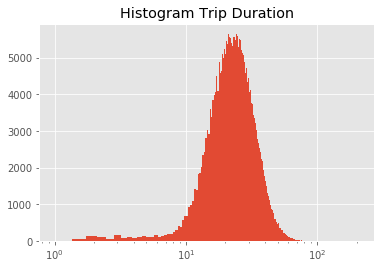

In [15]:
import matplotlib.pyplot as plt
#rng = np.random.RandomState(10)  # deterministic random data
#a = np.hstack((rng.normal(size=10),
#                rng.normal(loc=5, scale=2, size=10)))
plt.hist(yhist, bins= 'auto')  # arguments are passed to np.histogram
plt.xscale('log')
plt.title("Histogram Trip Duration")
plt.show()

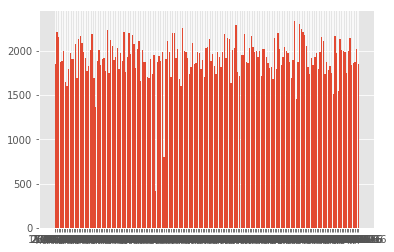

In [16]:
import matplotlib.pyplot as plt    
counts = data['pickup_datetime'].value_counts(sort=False)
plt.bar(counts.index,counts)
plt.show()

In [17]:
data.describe()

,vendor_id,passenger_count,trip_duration,Dia_semana_do,Dia_semana_ju,Dia_semana_lu,Dia_semana_ma,Dia_semana_mi,Dia_semana_sa,Dia_semana_vi,Distancia_Eucladiana,segmentos naturales
count,349320.000000,349320.000000,349320.000000,349320.000000,349320.000000,349320.000000,349320.000000,349320.000000,349320.000000,349320.000000,349320.000000,349320.000000
mean,1.534321,1.663143,837.969111,0.134736,0.148763,0.129294,0.138873,0.144017,0.151749,0.152568,0.035353,1.429806
std,0.498821,1.311686,676.576568,0.341442,0.355856,0.335526,0.345814,0.351107,0.358778,0.359571,0.041929,0.495049
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,398.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012587,1.000000
50%,2.000000,1.000000,663.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021231,1.000000
75%,2.000000,2.000000,1074.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038497,2.000000
max,2.000000,7.000000,43177.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.354755,2.000000


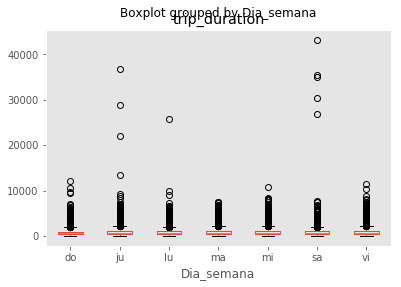

In [18]:
data.boxplot(by='Dia_semana', 
                       column=['trip_duration'], 
                       grid=False)

In [19]:
#pandas_profiling.ProfileReport(data)
#data.to_csv('data/test_enriched.csv') #Para guardar dataset enriquecido de test

In [20]:
data.dtypes

vendor_id                 int64
pickup_datetime          object
dropoff_datetime         object
passenger_count           int64
pickup_longitude         object
pickup_latitude          object
dropoff_longitude        object
dropoff_latitude         object
store_and_fwd_flag       object
trip_duration             int64
Dia_semana               object
Dia_semana_do             int64
Dia_semana_ju             int64
Dia_semana_lu             int64
Dia_semana_ma             int64
Dia_semana_mi             int64
Dia_semana_sa             int64
Dia_semana_vi             int64
Distancia_Eucladiana    float64
segmentos naturales       int64
dtype: object

In [21]:
list(data.columns.values)

['vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration',
 'Dia_semana',
 'Dia_semana_do',
 'Dia_semana_ju',
 'Dia_semana_lu',
 'Dia_semana_ma',
 'Dia_semana_mi',
 'Dia_semana_sa',
 'Dia_semana_vi',
 'Distancia_Eucladiana',
 'segmentos naturales']

In [22]:
data.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'Dia_semana',
       'Dia_semana_do', 'Dia_semana_ju', 'Dia_semana_lu', 'Dia_semana_ma',
       'Dia_semana_mi', 'Dia_semana_sa', 'Dia_semana_vi',
       'Distancia_Eucladiana', 'segmentos naturales'],
      dtype='object')

In [23]:
cat_vendor_id= pd.DataFrame(pd.get_dummies(data['vendor_id']))
cat_vendor_id=np.asarray(cat_vendor_id)
cat_vendor_id=pd.DataFrame(cat_vendor_id)
cat_vendor_id.columns=['vendor1','vendor2']
cat_vendor_id[0:5]

,vendor1,vendor2
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [24]:
cat_store_and_fwd_flag = pd.DataFrame(pd.get_dummies(data['store_and_fwd_flag']))
cat_store_and_fwd_flag =np.asarray(cat_store_and_fwd_flag)
cat_store_and_fwd_flag =pd.DataFrame(cat_store_and_fwd_flag)
cat_store_and_fwd_flag.columns=['store_flag_N','store_flag_Y']
cat_store_and_fwd_flag[0:5]

,store_flag_N,store_flag_Y
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [25]:
data_temp=data[['pickup_datetime', 'dropoff_datetime','passenger_count', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Dia_semana', 'Dia_semana_do', 'Dia_semana_ju','Dia_semana_lu', 'Dia_semana_ma', 'Dia_semana_mi', 'Dia_semana_sa','Dia_semana_vi','Distancia_Eucladiana', 'segmentos naturales','trip_duration']]
data_temp[0:5]

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Dia_semana,Dia_semana_do,Dia_semana_ju,Dia_semana_lu,Dia_semana_ma,Dia_semana_mi,Dia_semana_sa,Dia_semana_vi,Distancia_Eucladiana,segmentos naturales,trip_duration
0,12/06/2016,12/06/2016 0:54,1,-73.980.415,40.738.564,-73.999.481,40.731.152,do,1,0,0,0,0,0,0,0.020456,1,663
1,19/01/2016,19/01/2016 12:10,1,-73.979.027,40.763.939,-74.005.333,40.710.087,ma,0,0,0,1,0,0,0,0.059934,1,2124
2,6/04/2016,6/04/2016 19:39,1,-74.010.040,40.719.971,-74.012.268,40.706.718,mi,0,0,0,0,1,0,0,0.013438,1,429
3,26/03/2016,26/03/2016 13:38,1,-73.973.053,40.793.209,-73.972.923,40.782.520,sa,0,0,0,0,0,1,0,0.010690,2,435
4,19/02/2016,19/02/2016 10:11,2,-73.962.982,40.756.680,-73.984.406,40.760.719,vi,0,0,0,0,0,0,1,0.021801,1,1114


In [26]:
data_temp.columns

Index(['pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'Dia_semana', 'Dia_semana_do', 'Dia_semana_ju',
       'Dia_semana_lu', 'Dia_semana_ma', 'Dia_semana_mi', 'Dia_semana_sa',
       'Dia_semana_vi', 'Distancia_Eucladiana', 'segmentos naturales',
       'trip_duration'],
      dtype='object')

In [27]:
feature_cols = ['passenger_count', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','Dia_semana_do', 'Dia_semana_ju','Dia_semana_lu', 'Dia_semana_ma', 'Dia_semana_mi', 'Dia_semana_sa','Dia_semana_vi', 'Distancia_Eucladiana', 'segmentos naturales']
X = data_temp[feature_cols]
y = data_temp.trip_duration

In [28]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

In [30]:
import pandas as pd
X_train1 = pd.read_csv('data/X_train.csv', sep=',')
X_train1 = X_train1[X_train1.columns[1:20]] 
X_train1.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Dia_semana_do,Dia_semana_ju,Dia_semana_lu,Dia_semana_ma,Dia_semana_mi,Dia_semana_sa,Dia_semana_vi,Distancia_Eucladiana,segmentos naturales
0,1,-73.949.272,40.784.309,-73.953.377,40.782.536,0,0,0,0,0,1,0,0.004472,2
1,2,-73.972.832,40.747.581,-73.980.118,40.746.151,0,1,0,0,0,0,0,0.007425,2
2,1,-73.979.210,40.753.063,-73.972.588,40.743.526,0,0,0,1,0,0,0,0.011611,1
3,1,-73.984.261,40.766.781,-73.872.231,40.774.101,0,0,0,0,0,0,1,0.112269,1
4,1,-73.975.922,40.755.421,-73.950.233,40.786.739,0,0,1,0,0,0,0,0.040506,2


In [31]:
X_test1 = pd.read_csv('data/X_test.csv', sep=',')
X_test1 = X_test1[X_test1.columns[1:20]] 
X_test1.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Dia_semana_do,Dia_semana_ju,Dia_semana_lu,Dia_semana_ma,Dia_semana_mi,Dia_semana_sa,Dia_semana_vi,Distancia_Eucladiana,segmentos naturales
0,1,-73.970.070,40.793.976,-73.956.055,40.778.980,0,1,0,0,0,0,0,0.020525,2
1,1,-73.981.644,40.778.599,-73.969.559,40.793.846,0,0,0,0,0,0,1,0.019456,1
2,1,-73.960.266,40.770.615,-73.970.627,40.758.713,0,0,1,0,0,0,0,0.015780,2
3,2,-73.978.172,40.783.421,-73.960.815,40.807.030,0,0,0,0,1,0,0,0.029303,1
4,1,-73.998.512,40.760.723,-74.004.143,40.737.583,0,0,1,0,0,0,0,0.023815,2


In [32]:
y_train1 = pd.read_csv('data/y_train.csv', sep=',')
y_train1 = y_train1['y']
y_train1.head()

0     146
1     899
2     335
3    1796
4    1021
Name: y, dtype: int64

In [33]:
X_train1.dtypes

passenger_count           int64
pickup_longitude         object
pickup_latitude          object
dropoff_longitude        object
dropoff_latitude         object
Dia_semana_do             int64
Dia_semana_ju             int64
Dia_semana_lu             int64
Dia_semana_ma             int64
Dia_semana_mi             int64
Dia_semana_sa             int64
Dia_semana_vi             int64
Distancia_Eucladiana    float64
segmentos naturales       int64
dtype: object

In [34]:
y_test1 = pd.read_csv('data/y_test.csv', sep=',')
y_test1 = y_test1['y']
y_test1.head()

0    548
1    431
2    571
3    966
4     37
Name: y, dtype: int64

In [35]:
X_train1[0:5]

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Dia_semana_do,Dia_semana_ju,Dia_semana_lu,Dia_semana_ma,Dia_semana_mi,Dia_semana_sa,Dia_semana_vi,Distancia_Eucladiana,segmentos naturales
0,1,-73.949.272,40.784.309,-73.953.377,40.782.536,0,0,0,0,0,1,0,0.004472,2
1,2,-73.972.832,40.747.581,-73.980.118,40.746.151,0,1,0,0,0,0,0,0.007425,2
2,1,-73.979.210,40.753.063,-73.972.588,40.743.526,0,0,0,1,0,0,0,0.011611,1
3,1,-73.984.261,40.766.781,-73.872.231,40.774.101,0,0,0,0,0,0,1,0.112269,1
4,1,-73.975.922,40.755.421,-73.950.233,40.786.739,0,0,1,0,0,0,0,0.040506,2


In [36]:
X_train1.columns

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'Dia_semana_do',
       'Dia_semana_ju', 'Dia_semana_lu', 'Dia_semana_ma', 'Dia_semana_mi',
       'Dia_semana_sa', 'Dia_semana_vi', 'Distancia_Eucladiana',
       'segmentos naturales'],
      dtype='object')

In [37]:
X_train1.dtypes

passenger_count           int64
pickup_longitude         object
pickup_latitude          object
dropoff_longitude        object
dropoff_latitude         object
Dia_semana_do             int64
Dia_semana_ju             int64
Dia_semana_lu             int64
Dia_semana_ma             int64
Dia_semana_mi             int64
Dia_semana_sa             int64
Dia_semana_vi             int64
Distancia_Eucladiana    float64
segmentos naturales       int64
dtype: object

In [38]:
Xtrainprueba=X_train1[['passenger_count','Dia_semana_do', 'Dia_semana_ju','Dia_semana_lu', 'Dia_semana_ma', 'Dia_semana_mi', 'Dia_semana_sa','Dia_semana_vi', 'Distancia_Eucladiana', 'segmentos naturales']]
Xtrainprueba[0:5]

,passenger_count,Dia_semana_do,Dia_semana_ju,Dia_semana_lu,Dia_semana_ma,Dia_semana_mi,Dia_semana_sa,Dia_semana_vi,Distancia_Eucladiana,segmentos naturales
0,1,0,0,0,0,0,1,0,0.004472,2
1,2,0,1,0,0,0,0,0,0.007425,2
2,1,0,0,0,1,0,0,0,0.011611,1
3,1,0,0,0,0,0,0,1,0.112269,1
4,1,0,0,1,0,0,0,0,0.040506,2


In [39]:
Xtrainprueba=np.asarray(Xtrainprueba)
Xtrainprueba

array([[1.      , 0.      , 0.      , ..., 0.      , 0.004472, 2.      ],
       [2.      , 0.      , 1.      , ..., 0.      , 0.007425, 2.      ],
       [1.      , 0.      , 0.      , ..., 0.      , 0.011611, 1.      ],
       ...,
       [2.      , 0.      , 0.      , ..., 1.      , 0.003131, 1.      ],
       [1.      , 0.      , 0.      , ..., 0.      , 0.012187, 1.      ],
       [2.      , 0.      , 0.      , ..., 0.      , 0.040478, 1.      ]])

In [40]:
y_train1=np.asarray(y_train1)

In [41]:
model = smf.OLS(y_train1, Xtrainprueba)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                 2.583e+04
Date:                Sun, 24 Jun 2018   Prob (F-statistic):               0.00
Time:                        22:59:21   Log-Likelihood:            -1.9948e+06
No. Observations:              261990   AIC:                         3.990e+06
Df Residuals:                  261980   BIC:                         3.990e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.2402      0.752      5.636      0.0

In [42]:
results.params

array([ 4.24022675e+00, -9.09192451e+12, -1.81838490e+13, -1.81838490e+13,
       -9.09192451e+12, -9.09192451e+12, -1.81838490e+13, -9.09192451e+12,
        1.09978757e+04,  9.09192451e+12])

In [43]:
# Obteniendo fitted values
fit=results.fittedvalues;
# Obteniendo residuos
Residuos=results.resid;

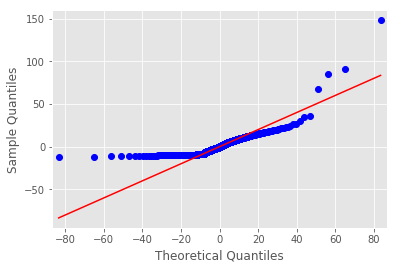

In [44]:
Gráfico = sm.qqplot(Residuos, stats.t, fit=True, line='q')

In [45]:
Xtestprueba=X_test1[['passenger_count','Dia_semana_do', 'Dia_semana_ju','Dia_semana_lu', 'Dia_semana_ma', 'Dia_semana_mi', 'Dia_semana_sa','Dia_semana_vi', 'Distancia_Eucladiana', 'segmentos naturales']]

In [46]:
y_pred= results.predict(Xtestprueba)

In [47]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test1, y_pred))
print('MSE:', metrics.mean_squared_error(y_test1, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

MAE: 324.1752778836382
MSE: 227456.38905614248
RMSE: 476.9238818261699


In [48]:
comp_ypred=pd.DataFrame(y_pred)
comp_ytest=pd.DataFrame(y_test1)
comp_ytest=np.asarray(comp_ytest)
comp_ytest=pd.DataFrame(comp_ytest)
comp_ytest.columns=['ytest']
comp_ypred.columns=['ypred']


In [49]:
comp_ytest[0:5]
comp_ytest.dtypes

ytest    int64
dtype: object

In [50]:
comp_ypred[0:5]
comp_ypred.dtypes
comp_ypred.astype('int64')
comp_ypred[0:5]
comp_ypred.dtypes

ypred    float64
dtype: object

In [51]:
comparativo=pd.concat([comp_ytest,comp_ypred],axis=1)
comparativo
comparativo['diferencia']= (((comparativo["ytest"])*(comparativo["ytest"])) - ((comparativo["ypred"])*(comparativo["ypred"])))/13412
comparativo[0:5]


,ytest,ypred,diferencia
0,548,647.792969,-8.897385
1,431,617.771484,-14.604877
2,571,503.136719,5.435017
3,966,749.414062,27.701652
4,37,591.503906,-25.984780


In [52]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(str(iteration), str(data[0]), str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [53]:
X.dtypes

passenger_count           int64
pickup_longitude         object
pickup_latitude          object
dropoff_longitude        object
dropoff_latitude         object
Dia_semana_do             int64
Dia_semana_ju             int64
Dia_semana_lu             int64
Dia_semana_ma             int64
Dia_semana_mi             int64
Dia_semana_sa             int64
Dia_semana_vi             int64
Distancia_Eucladiana    float64
segmentos naturales       int64
dtype: object

In [54]:
X_kf = X[['passenger_count','Dia_semana_do', 'Dia_semana_ju','Dia_semana_lu', 'Dia_semana_ma', 'Dia_semana_mi', 'Dia_semana_sa','Dia_semana_vi', 'Distancia_Eucladiana', 'segmentos naturales']]

passenger_count         349320
pickup_longitude        349320
pickup_latitude         349320
dropoff_longitude       349320
dropoff_latitude        349320
Dia_semana_do           349320
Dia_semana_ju           349320
Dia_semana_lu           349320
Dia_semana_ma           349320
Dia_semana_mi           349320
Dia_semana_sa           349320
Dia_semana_vi           349320
Distancia_Eucladiana    349320
segmentos naturales     349320
dtype: int64

In [55]:
# Create k-folds
kf = KFold(X.shape[0], n_folds=10, random_state=0)

result_list = []

for train_index, test_index in kf:
    X_train, X_test = X_kf.iloc[train_index], X_kf.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train a logistic regression model
    model = smf.OLS(y_train, X_train)
    results = model.fit()
    
    #est = sm.OLS(y, X.astype(float)).fit()
    
    # make predictions for testing set
    y_pred= results.predict(X_test)
    

    # calculate testing accuracy
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    errors = [mae,mse,rmse]
    result_list.append(errors)
    

MAE: 287.8006280505697
MSE: 170861.50312479486
RMSE: 413.3539683186734
MAE: 287.8150274551271
MSE: 248247.2852734577
RMSE: 498.24420244841554
MAE: 287.5410717468716
MSE: 196424.21799376293
RMSE: 443.19771884990894
MAE: 287.38789693189625
MSE: 172048.4856522024
RMSE: 414.78727759202354
MAE: 290.4648702523832
MSE: 198946.7555435178
RMSE: 446.03447797621857
MAE: 286.3764162560475
MSE: 197773.82820749277
RMSE: 444.7176949565789
MAE: 287.2834263265058
MSE: 196851.79449012884
RMSE: 443.6798333146649
MAE: 290.0072991141718
MSE: 216896.9973477257
RMSE: 465.7220172460453
MAE: 287.2028106476288
MSE: 174910.11862854802
RMSE: 418.222570682822
MAE: 290.461696354368
MSE: 204835.42068149967
RMSE: 452.5874729613046


In [56]:
result_list

[[287.8006280505697, 170861.50312479486, 413.3539683186734],
 [287.8150274551271, 248247.2852734577, 498.24420244841554],
 [287.5410717468716, 196424.21799376293, 443.19771884990894],
 [287.38789693189625, 172048.4856522024, 414.78727759202354],
 [290.4648702523832, 198946.7555435178, 446.03447797621857],
 [286.3764162560475, 197773.82820749277, 444.7176949565789],
 [287.2834263265058, 196851.79449012884, 443.6798333146649],
 [290.0072991141718, 216896.9973477257, 465.7220172460453],
 [287.2028106476288, 174910.11862854802, 418.222570682822],
 [290.461696354368, 204835.42068149967, 452.5874729613046]]

In [61]:
b=np.asmatrix(result_list)
b

matrix([[   287.80062805, 170861.50312479,    413.35396832],
        [   287.81502746, 248247.28527346,    498.24420245],
        [   287.54107175, 196424.21799376,    443.19771885],
        [   287.38789693, 172048.4856522 ,    414.78727759],
        [   290.46487025, 198946.75554352,    446.03447798],
        [   286.37641626, 197773.82820749,    444.71769496],
        [   287.28342633, 196851.79449013,    443.67983331],
        [   290.00729911, 216896.99734773,    465.72201725],
        [   287.20281065, 174910.11862855,    418.22257068],
        [   290.46169635, 204835.4206815 ,    452.58747296]])

In [70]:
RMSE=b[:,2]
RMSE


matrix([[413.35396832],
        [498.24420245],
        [443.19771885],
        [414.78727759],
        [446.03447798],
        [444.71769496],
        [443.67983331],
        [465.72201725],
        [418.22257068],
        [452.58747296]])

In [68]:
RMSE.min()

413.3539683186734

In [69]:
RMSE.max()

498.24420244841554

##  Learning Curve

In [78]:
train_sizes = [1, 100, 500, 2000, 5000, 7654]

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

features = ['passenger_count','Dia_semana_do', 'Dia_semana_ju','Dia_semana_lu', 'Dia_semana_ma', 'Dia_semana_mi', 'Dia_semana_sa','Dia_semana_vi', 'Distancia_Eucladiana', 'segmentos naturales']
target = 'trip_duration'

train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = LinearRegression(), X = data_temp[features],
                                                   y = data_temp[target], train_sizes = train_sizes, cv = 10,
                                                   scoring = 'neg_mean_squared_error')

In [85]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[     -0.              -0.              -0.              -0.
       -0.              -0.              -0.              -0.
       -0.              -0.        ]
 [-148035.65959645 -190634.34434415 -190634.34434415 -190634.34434415
  -190634.34434415 -190634.34434415 -190634.34434415 -190634.34434415
  -190634.34434415 -190634.34434415]
 [-212690.48470528 -203301.25431181 -203301.25431181 -203301.25431181
  -203301.25431181 -203301.25431181 -203301.25431181 -203301.25431181
  -203301.25431181 -203301.25431181]
 [-189109.87281608 -182195.72146904 -182195.72146904 -182195.72146904
  -182195.72146904 -182195.72146904 -182195.72146904 -182195.72146904
  -182195.72146904 -182195.72146904]
 [-174140.1986     -176850.9928     -176850.9928     -176850.9928
  -176850.9928     -176850.9928     -176850.9928     -176850.9928
  -176850.9928     -176850.9928    ]
 [-165575.33328978 -185582.29448654 -185582.29448654 -185582.29448654
  -185582.29448654 -185582.29448654 -185582.294486

In [81]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1           -0.000000
100     182330.908855
500     193059.622880
2000    179442.496475
5000    178775.573640
7654    184344.106234
dtype: float64

 --------------------

Mean validation scores

 1       536891.978770
100     234347.608247
500     199881.777626
2000    198739.583969
5000    198311.354912
7654    197936.971364
dtype: float64


(0, 500000)

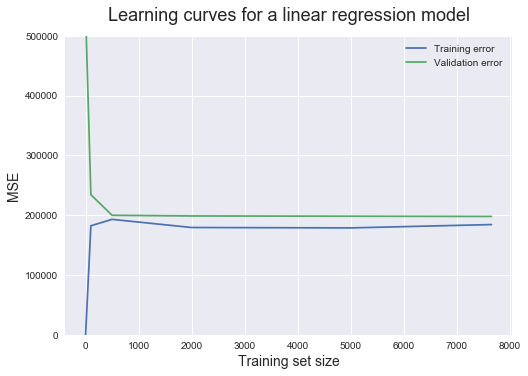

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,500000)